## <center>Tópicos III - Evolução Diferencial</center><br>
### Encontrando um Mínimo Global na Função de Rastringin usando Evolução Diferencial

Prof. Me. Carlos Igor Ramos Bandeira<br/>
João Vitor Chaves de Oliveira

### 1. Introdução

<p style="text-align: justify;">Meta-heurísticas têm sido frequentemente empregadas na resolução de problemas de otimização.  Em particular, pode-se destacar a Evolução Diferencial (DE), que vem sendo aplicada com sucesso em situações onde o espaço de busca é contínuo.  Apesar das vantagens dessas técnicas, elas precisam de adequações para tratar as restrições, que comumente limitam o espaço de busca em problemas reais de otimização. Nesse trabalho, usaremos algoritmos genéticos para encontrar um mínimo global na função de Rastringin. A função de Rastrigin é uma função não convexa usada como um problema de teste de desempenho para algoritmos de otimização. É um exemplo típico de função multimodal não-linear. Foi proposto pela primeira vez por Rastrigin como uma função bidimensional. Encontrar o mínimo desta função é um problema bastante difícil devido ao seu grande espaço de busca e ao grande número de mínimos locais.</p> </br> A função de Rastringin se configura da seguinte maneira:</p>

<b>$f(x_1,x_2) = 20 + x_{1}^2 + x_{2}^2 - 10[cos(2\pi x_1)+cos(2\pi x_2)]$, onde $x_i \in [-5.12;+5.12], i={1,2}$.</b><br> 
<p style="text-align: justify;">Esta função possui um mínimo global em ${x_1,x_2}= {0,0}$, para o qual $f(x_1,x_2)=0$.<br>
Antes de começarmos a busca por um mínimo global nesta função, é essencial estarmos familiarizados com algumas terminologias básicas que serão usadas ao longo deste trabalho e apresentadas na Seção seguinte.</p>

### 2. Fundamentação Teórica

Nesta Seção, apresentaremos algumas definições importantes ao entendimento deste trabalho.<br>

<b>2.1. Mutação</b><br> 
<p style="text-align: justify;">No operador mutação cada indivíduo é modificado através da adição da diferença vetorial ponderada entre dois indivíduos aleatórios da população a um terceiro indivíduo. São gerados então os vetores doadores ou modificados. </p>
O operador de mutação é definido por:

<center> $u = x_1 + \beta (x_2 - x_3)$ </center>


<p style="text-align: justify;">onde $u$ é o novo indivíduo gerado através da mutação, $x_1$ é o indivíduo usado como base para mutação. Dizemos que $x_1$ sofre uma perturbação. Os outros dois vetores $x_2 , x_3$ são escolhidos para se fazer a mutação. O valor $\beta$ é um fator que determina a ponderação da diferença de $x_2$ e $x_3$. Vale ressaltar que $x_1,x_2,x_3$ são escolhidos de forma aleatória com a restrição de que $x_1 \neq x_2 \neq x_3$.</p>


<b>2.2. Cruzamento</b><br> 

<p style="text-align: justify;">Cruzamento, ou $\textit{crossover}$ em inglês, é introduzido na população para aumentar a diversidade dos indivíduos que sofreram a mutação. Assim, os membros da população e os vetores mutantes trocam atributos para formar o vetor modificado.</p>

<b>2.3. Seleção</b><br> 

<p style="text-align: justify;">O operador seleção tem como finalidade selecionar os melhores indivíduos. Este
operador visa simplesmente escolher os indivíduos com melhores características que serão preservados para a próxima geração. Se a aptidão determinada através do cálculo da função objetivo do indivíduo $i$ da população corrente é maior do que a aptidão do indivíduo $i$ da população de cruzamento, esse indivíduo passa para próxima geração com os melhores entre as duas populações. Note que no nosso caso, indivíduos com maior aptidão são aqueles que tem o menor valor de fitness.</p>


### 3. Metodologia

Nesta Seção, mostraremos os passos algorítmicos para se encontrar os resultados desejados.

In [1]:
import random
import struct
import numpy as np
np.seterr(all='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [2]:
def Rastringin(X,Y):
        return ( 20+(np.power(X,2)+np.power(Y,2))-(10*(np.cos(2*np.pi*X) + np.cos(2*np.pi*Y)) ) )

In [3]:
class Chromosome  :
    def __init__(self, x1, x2) :
        self.x1 = x1
        self.x2 = x2
        self.fitness = 0
        
    def __lt__(self, other):
        return (self.fitness < other.fitness)

    def __eq__(self, other):
        return (self.fitness == other.fitness)

    def __gt__(self, other):
        return(self.fitness > other.fitness)

    def __le__(self, other):
        return(self.fitness <= other.fitness)
    
    def __cmp__(self, other) :
        if self.fitness < other.fitness:
            return -1
        elif self.fitness > other.fitness:
            return 1
        else:
            return 0
        
    def __sub__(self, other):
        return Chromosome(self.x1 - other.x1, self.x2 - other.x2)
    
    def __add__(self,other):
        return Chromosome(self.x1 + other.x1, self.x2+other.x2)

    def __mul__(self,other):
        if(type(other)==float or type(other)==int):
            return Chromosome(self.x1 * other , self.x2*other)
        return Chromosome(self.x1*other.x1, self.x2*other.x2)
        
    def __repr__(self) :
        return '({},{})'.format(self.x1,self.x2)

    def printSolution(self, problem) :
        return self.__repr__()
                

In [4]:
class ED:
    def __init__(self, popsize=500, iterations=7,beta=0.3,Cr = 0.8 ,problemParams=None):
        self.beta = beta
        self.popsize = popsize
        self.iterations = iterations
        self.Cr = Cr
        self.poplist = []
        self.problemParams = problemParams
    
    def singlePointCrossover(self, pop_mutada):
        list_cNew = []
        
        for i in range(self.popsize):
            Ipop_cor = random.choice(self.poplist)
            Ipop_mut = random.choice(pop_mutada)
            xi1 = None
            xi2 = None
            if random.random() >= self.Cr:
                xi1 = Ipop_mut.x1
            else:
                xi1 = Ipop_cor.x1
            if random.random() >= self.Cr:
                xi2 = Ipop_mut.x2
            else:
                xi2 = Ipop_cor.x2

            cNew = Chromosome(xi1,xi2)
            cNew.fitness = Rastringin(xi1,xi2)
            list_cNew.append(cNew)
        return list_cNew

        
    def makeInitialPopulation(self) :    
        for j in range(self.popsize):
            self.poplist.append(Chromosome(random.uniform(-5.12,5.12),random.uniform(-5.12,5.12)))
            
    def assignFitness(self) :
        for chrom in self.poplist :
                fit = Rastringin(chrom.x1, chrom.x2)
                chrom.fitness = fit
    
    def mutate(self):
        x_a = x_b = x_y = None
        popCross = []
        while(len(popCross)<self.popsize):
            ele = random.sample(self.poplist,3)
            x_a = ele[0]
            x_b = ele[1]
            x_y = ele[2]
            
            new_chrom = x_a + ((x_b - x_y)*self.beta)
            new_chrom.fitness = Rastringin(new_chrom.x1,new_chrom.x2)
            popCross.append(new_chrom)
        
        return popCross

    def runDE(self):
        melhoresResultados = []
        self.makeInitialPopulation() #Populaca inicial
        
        for i in range(1, self.iterations+1) :       
            self.assignFitness()
            
            pop_mut = self.mutate() # lista de elementos mutados
            
            pop_cross = self.singlePointCrossover(pop_mut) # lista de filhos através do cross-over

            pop_selecao = []
            for j in range(self.popsize):
                pop_selecao.append(pop_cross[j])
                pop_selecao.append(self.poplist[j]) 
            
            pop_selecao.sort()
            melhoresResultados.append(pop_selecao[0].fitness)
            self.poplist = pop_selecao[:self.popsize]
            
        best_solution = min(self.poplist)
        print('({},{}) = {}'.format(best_solution.x1, best_solution.x2, best_solution.fitness))
        if(best_solution.fitness<1 and best_solution.fitness>-1):
            print('Valor próximo de 0')

        return melhoresResultados

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotar(X):
    plt.plot(X)
    plt.title("Gráfico da função de aptidão do melhor individuo")
    plt.grid(True)
    plt.xlabel("Iterações")
    plt.ylabel("Fitness/Aptidão")
    plt.show()

### 5. Resultados

#### 5.1 Fixando o fator $\beta$, taxa de cruzamento e variando <i>o número de iterações</i>

(1.1988358216578407e-09,6.616311288236679e-10) = 0.0
Valor próximo de 0


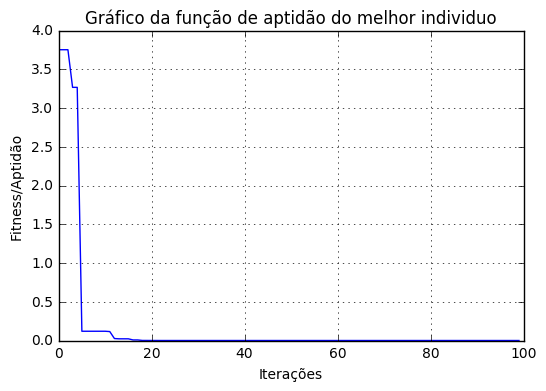

In [22]:
teste1 = ED(popsize=50,iterations=100, beta=0.5, Cr=0.5)
plotParams = teste1.runDE()
plotar(plotParams)

(-1.9403262923901325e-09,1.2190456005789643e-09) = 0.0
Valor próximo de 0


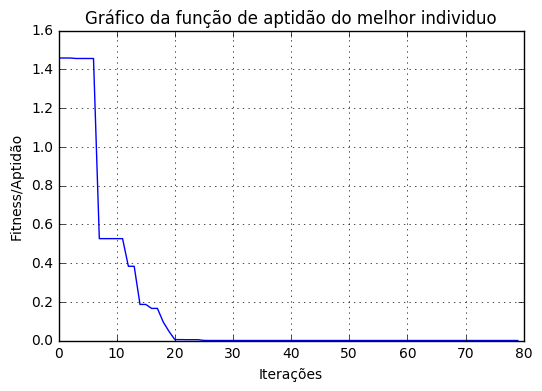

In [20]:
teste = ED(popsize=50,iterations=80, beta=0.5, Cr=0.5)
plotParams = teste.runDE()
plotar(plotParams)

(0.00013673514827016592,0.000209800767623166) = 1.2441734327239828e-05
Valor próximo de 0


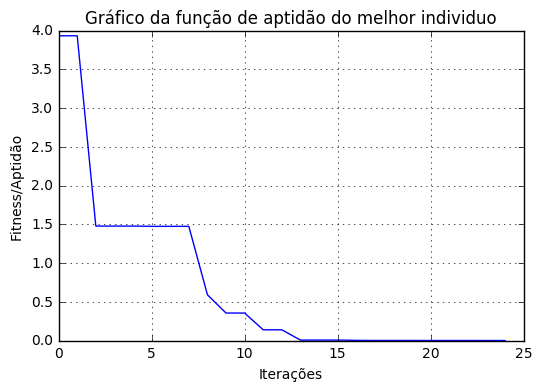

In [58]:
teste = ED(popsize=100,iterations=25, beta=0.5, Cr=0.5)
plotParams = teste.runDE()
plotar(plotParams)

(2.9430264196785537e-06,4.830972313045988e-05) = 4.6473162740312546e-07
Valor próximo de 0


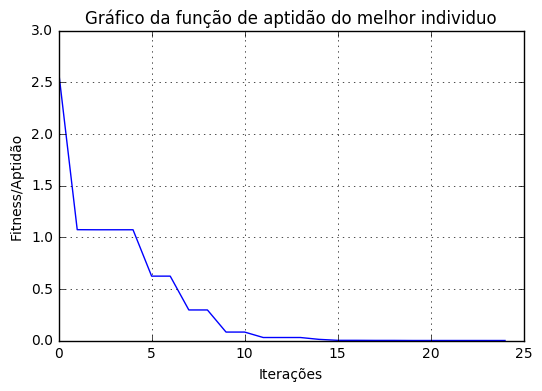

In [59]:
teste = ED(popsize=500,iterations=25, beta=0.5, Cr=0.5)
plotParams = teste.runDE()
plotar(plotParams)

#### 5.2 Fixando tamanho da população, taxa de cruzamento e variando <i>o fator $\beta$</i>

(-1.5098175471624947e-09,-1.3259385964215352e-08) = 3.552713678800501e-14
Valor próximo de 0


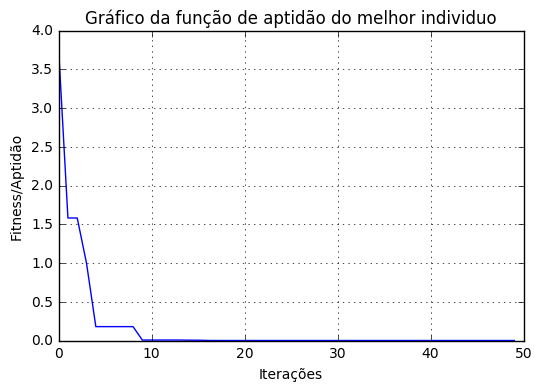

In [61]:
teste = ED(popsize=500,iterations=50, beta=0.2, Cr=0.5)
plotParams = teste.runDE()
plotar(plotParams)

(-2.0923393699761583e-08,-8.446065106633314e-09) = 1.0302869668521453e-13
Valor próximo de 0


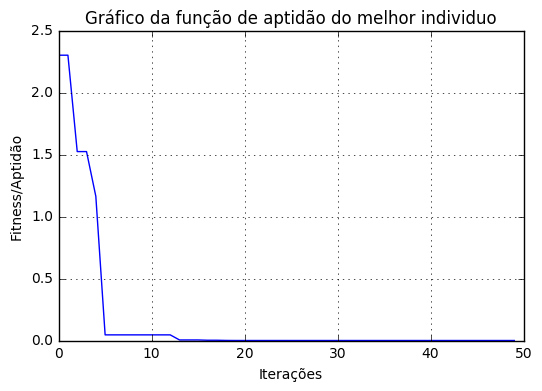

In [62]:
teste = ED(popsize=500,iterations=50, beta=0.5, Cr=0.5)
plotParams = teste.runDE()
plotar(plotParams)

(1.1556298944450394e-07,-1.0459657126598124e-07) = 4.82103246213228e-12
Valor próximo de 0


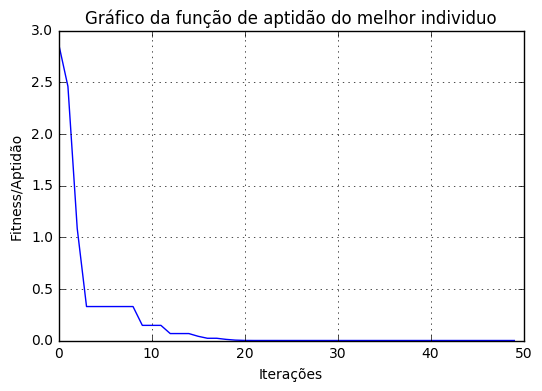

In [63]:
teste = ED(popsize=500,iterations=50, beta=0.7, Cr=0.5)
plotParams = teste.runDE()
plotar(plotParams)

(8.43486450769951e-08,4.2549309349598134e-08) = 1.77280412572145e-12
Valor próximo de 0


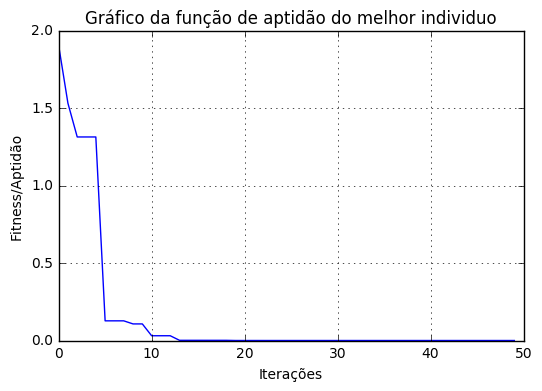

In [65]:
teste = ED(popsize=500,iterations=50, beta=0.9, Cr=0.5)
plotParams = teste.runDE()
plotar(plotParams)

#### 5.3 Fixando o tamanho da população, taxa de cruzamento e variando  <i>a taxa de cruzamento</i>

(-8.375829315382812e-08,2.0392334093995948e-07) = 9.64206492426456e-12
Valor próximo de 0


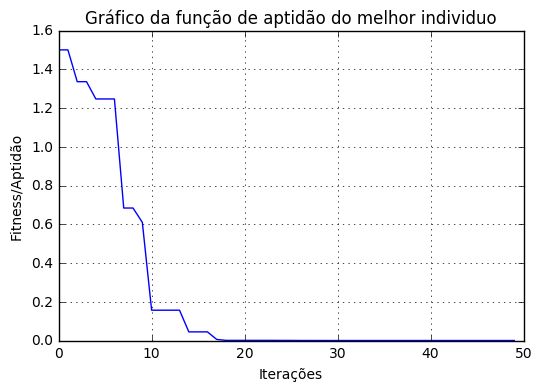

In [67]:
teste = ED(popsize=500,iterations=50, beta=0.5, Cr=0.2)
plotParams = teste.runDE()
plotar(plotParams)

(-5.019147978505223e-09,-5.345956680167906e-09) = 7.105427357601002e-15
Valor próximo de 0


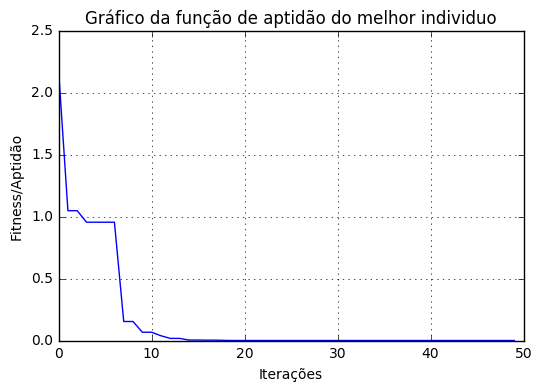

In [68]:
teste = ED(popsize=500,iterations=50, beta=0.5, Cr=0.5)
plotParams = teste.runDE()
plotar(plotParams)

(-2.382995950511585e-09,-2.2470307705141552e-08) = 1.0302869668521453e-13
Valor próximo de 0


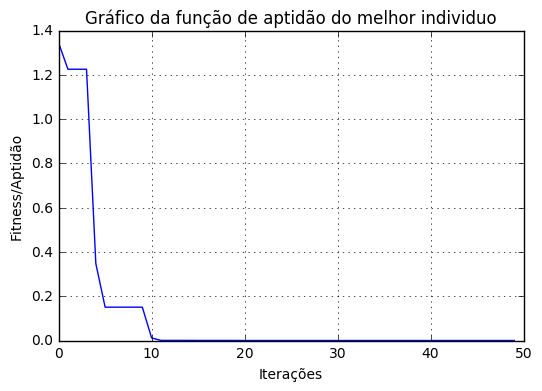

In [69]:
teste = ED(popsize=500, iterations=50, beta=0.5, Cr=0.7)
plotParams = teste.runDE()
plotar(plotParams)

(-3.103916498079645e-07,-4.2143063583541013e-07) = 5.434941385829006e-11
Valor próximo de 0


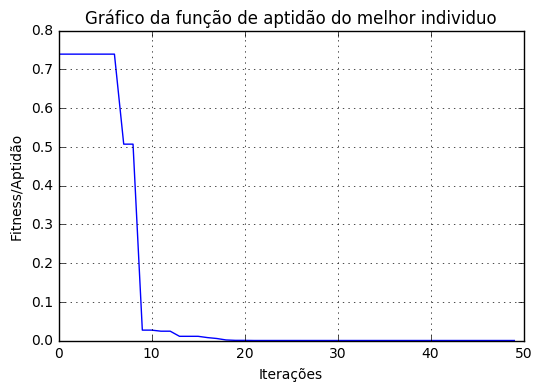

In [70]:
teste = ED(popsize=500,iterations=50, beta=0.5, Cr=0.9)
plotParams = teste.runDE()
plotar(plotParams)

#### Implementação extra

O Scipy, possui uma biblioteca que implementa a técnica de evolução diferencial. Basta passar como parâmentros o domínio de $x_1, x_2 ... x_n$ e a função objetivo. No nosso caso, lidamos com apenas duas variáveis com o domínio no intervalo $[-5.12,5.12]$, e a função objetivo é a função de Rastringin.

In [71]:
from scipy.optimize import differential_evolution

def RastringinObj(X):
        return ( 20+(np.power(X[0],2)+np.power(X[1],2))-(10*(np.cos(2*np.pi*X[0]) + np.cos(2*np.pi*X[1])) ) )

bounds = [(-5.12,5.12), (-5.12, 5.12)]
result = differential_evolution(RastringinObj, bounds)
print("x1 = {} \nx2 = {} \nResultado = {} ".format(result.x[0],result.x[1],result.fun))


x1 = 1.963421709660906e-09 
x2 = -1.4313627616502344e-09 
Resultado = 0.0 


### 5. Conclusão

Em todos os resultados, obtivemos valores infinitesimalmente próximos de 0.0 ou iguais a 0.0. A função convergiu mais rápido quando alteramos a taxa de mutação pois logo de cara a população inicial já começava com um fitness mais baixo. Logo em seguida, ao variármos <i>o fator $\beta$</i> obtevemos bons resultados. E por último variando o número de iterações.<br>
Vale ressaltar, que o fato de o processo de evolução diferencial envolver alguns processos aleatórios, fica difícil se chegar em uma conclusão de quais foram os melhores parâmetros em questão de valores uma vez que dependendo da população inicial gerada, pode ser que seu fitness incialmente seja melhor ou pior.

### 6. Referências

<b>Template tomado como base no trabalho - Universidade de São Francisco:</b> https://www.cs.usfca.edu/~brooks/F06classes/cs662/assignments/code/ga.py </b>

<b>O Algoritmo Evolutivo Differential Evolution: http://www.computacaointeligente.com.br/algoritmos/o-algoritmo-evolutivo-differential-evolution/ </b>

<b>Biblioteca Difference Evolution - scipy: https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.differential_evolution.html </b>


<b>Engelbrecht, A. P. (2007). Computational intelligence: an introduction. John Wiley &
Sons.</b>